In [91]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [92]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

#Dropping the first few rows
df = df.drop([0, 1, 2, 3, 4])

#Drop the blank column
df = df.drop(columns='Unnamed: 4')

df.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
5,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,0,3,2,46,10,36,0,NaN


In [93]:
df.columns = ['city', 'population', 'violent_crime', 'murder_manslaughter', 'rape',
             'robbery', 'agg_assault', 'property_crime', 'burglary', 'larceny', 'motor_theft', 'arson']

df.head(30)

,city,population,violent_crime,murder_manslaughter,rape,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson
5,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,0,3,2,46,10,36,0,NaN
10,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1
13,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0
14,Arcade Village,2053,0,0,0,0,0,39,3,35,1,0


In [94]:
#Replacing NaN values with 0
#df.arson[df.arson.isnull()] = 0

#Replacing NaN values with rounded mean
df.arson[df.arson.isnull()] = round(df.arson.mean(),0)

df.arson.mean()

1.937142857142857

In [95]:
df.head(30)

,city,population,violent_crime,murder_manslaughter,rape,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson
5,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,30,227,526,4090,705,3243,142,2.000
8,Albion Village,6388,23,0,3,4,16,223,53,165,5,2.000
9,Alfred Village,4089,5,0,0,3,2,46,10,36,0,2.000
10,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1
13,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0
14,Arcade Village,2053,0,0,0,0,0,39,3,35,1,0


In [96]:
#I see a handful of NaNs (particularly in arson), let's remove that one too
#df = df.drop(columns='arson')

In [97]:
df['population_squared'] = df['population'] **2

df.head()

,city,population,violent_crime,murder_manslaughter,rape,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson,population_squared
5,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0,6640929
6,Akron Village,2846,3,0,0,0,3,16,1,15,0,0,8099716
7,Albany,97956,791,8,30,227,526,4090,705,3243,142,2.000,9595377936
8,Albion Village,6388,23,0,3,4,16,223,53,165,5,2.000,40806544
9,Alfred Village,4089,5,0,0,3,2,46,10,36,0,2.000,16719921


### Propertycrime=α+Population+Population2+Murder+Robbery

In [98]:
#Attempting to drop all NaN values rows in anticipation of the following error...
#df.dropna()

In [99]:
df.columns

Index(['city', 'population', 'violent_crime', 'murder_manslaughter', 'rape',
       'robbery', 'agg_assault', 'property_crime', 'burglary', 'larceny',
       'motor_theft', 'arson', 'population_squared'],
      dtype='object')

In [100]:
#More rows to drop
df = df.drop([352, 353, 354])

In [134]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime'].values.reshape(-1, 1)
X = df[['population', 'population_squared', 'murder_manslaughter', 'robbery']]
regr.fit(X, Y)
plt.show()

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


#The model where the outcome property crime is predicted by the features population, population squared, 
#murder/manslaughter, and roberry explains 99.8% of the variance in property crime


Coefficients: 
 [[ 1.59183918e-02 -1.01014349e-09  1.17553360e+02  2.09300109e+00]]

Intercept: 
 [24.32759066]

R-squared:
0.998741790547199


In [102]:
px = X.head(1)
px

,population,population_squared,murder_manslaughter,robbery
5,2577,6640929,0,0


In [103]:
regr.predict(px)

array([[65.34257809]])

In [104]:
df.head(1)

,city,population,violent_crime,murder_manslaughter,rape,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson,population_squared
5,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0,6640929


In [112]:
df_nj = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_jersey_by_city_2013.xls')

#Dropping the first few rows and the last two
df_nj = df_nj.drop([0, 1, 2, 3, 4, 483, 484])


#Drop the blank column
df_nj = df_nj.drop(columns='Unnamed: 4')

df_nj.columns = ['city', 'population', 'violent_crime', 'murder_manslaughter', 'rape',
             'robbery', 'agg_assault', 'property_crime', 'burglary', 'larceny', 'motor_theft', 'arson']

df_nj['population_squared'] = df_nj['population'] **2

df_nj

,city,population,violent_crime,murder_manslaughter,rape,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson,population_squared
5,Absecon,8380,21,0,2,4,15,266,91,169,6,0,70224400
6,Allendale,6712,0,0,0,0,0,37,6,29,2,0,45050944
7,Allenhurst,493,0,0,0,0,0,39,20,18,1,0,243049
8,Allentown,1812,3,0,0,0,3,18,12,6,0,0,3283344
9,Alpha,2314,1,0,0,0,1,31,15,15,1,1,5354596
10,Alpine,1958,0,0,0,0,0,10,6,2,2,0,3833764
11,Andover Township,6273,1,0,0,0,1,33,10,23,0,0,39350529
12,Asbury Park,15779,264,6,9,126,123,842,196,616,30,3,248976841
13,Atlantic City,39482,685,3,9,367,306,2475,393,2011,71,2,1558828324
14,Atlantic Highlands,4352,0,0,0,0,0,77,18,58,1,0,18939904


In [121]:
df['population'] = pd.to_numeric(df['population'])
df['property_crime'] = pd.to_numeric(df['property_crime'])
df['population_squared'] = pd.to_numeric(df['population_squared'])
df['murder_manslaughter'] = pd.to_numeric(df['murder_manslaughter'])
df['robbery'] = pd.to_numeric(df['robbery'])

df_nj1 = df_nj.drop(columns=['city', 'property_crime'])

#df_nj.dtypes

target = df_nj['property_crime']


from sklearn.model_selection import cross_val_score
cross_val_score(regr, df_nj1, target, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
import math
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
#linear_formula = 'property_crime ~ population'
linear_formula = 'property_crime ~ population+population_squared+murder_manslaughter+robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

In [123]:
lm.params

Intercept              24.328
population              0.016
population_squared     -0.000
murder_manslaughter   117.553
robbery                 2.093
dtype: float64

In [124]:
lm.pvalues

Intercept             0.194
population            0.000
population_squared    0.000
murder_manslaughter   0.000
robbery               0.002
dtype: float64

In [125]:
lm.rsquared

0.9987417905471989

In [126]:
lm.conf_int()

,0,1
Intercept,-12.461,61.116
population,0.014,0.018
population_squared,-0.000,-0.000
murder_manslaughter,87.917,147.190
robbery,0.782,3.404


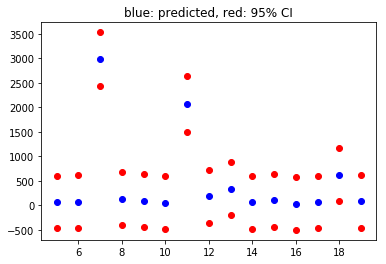

In [127]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

### property crime=α+population+motor theft+larceny

In [129]:
df.columns

Index(['city', 'population', 'violent_crime', 'murder_manslaughter', 'rape',
       'robbery', 'agg_assault', 'property_crime', 'burglary', 'larceny',
       'motor_theft', 'arson', 'population_squared'],
      dtype='object')

In [135]:
# Instantiate and fit our new model.
regr2 = linear_model.LinearRegression()
Y = df['property_crime'].values.reshape(-1, 1)
X = df[['population', 'motor_theft', 'larceny']]
regr2.fit(X, Y)
plt.show()

# Inspect the results.
print('\nCoefficients: \n', regr2.coef_)
print('\nIntercept: \n', regr2.intercept_)
print('\nR-squared:')
print(regr2.score(X, Y))

#The model where the outcome property crime is predicted by the features population, motor theft, and 
#larceny explains 99.9% of the variance in property crime


Coefficients: 
 [[-3.58179492e-03  3.80751256e+00  1.21879604e+00]]

Intercept: 
 [22.95677793]

R-squared:
0.9999678917277126


In [136]:
df['motor_theft'] = pd.to_numeric(df['motor_theft'])
df['larceny'] = pd.to_numeric(df['larceny'])

target = df_nj['property_crime']

cross_val_score(regr, df_nj1, target, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [143]:
linear_formula2 = 'property_crime ~ population+motor_theft+larceny'

# Fit the model to our data using the formula.
lm2 = smf.ols(formula=linear_formula2, data=df).fit()

In [144]:
lm2.params

Intercept     22.957
population    -0.004
motor_theft    3.808
larceny        1.219
dtype: float64

In [145]:
lm2.pvalues

Intercept     0.000
population    0.000
motor_theft   0.000
larceny       0.000
dtype: float64

In [147]:
lm2.rsquared

0.9999678917277126

In [148]:
lm2.conf_int()

,0,1
Intercept,18.109,27.804
population,-0.004,-0.003
motor_theft,3.643,3.972
larceny,1.199,1.239


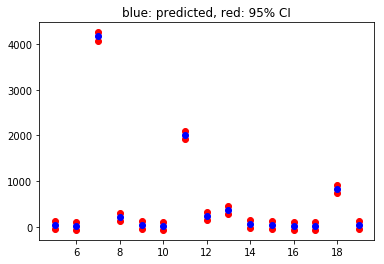

In [149]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm2)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm2.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()